In [1]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def generate_board(n, m):
    # Generate a blank board of size n
    board = [[0 for _ in range(n)] for _ in range(n)]
    
    # Populate the board with random valid entries
    for i in range(n):
        for j in range(n):
            options = [num for num in range(1, n+1) if num not in board[i] and num not in [board[k][j] for k in range(n)]]
            if not options:
                return None  # Invalid board
            board[i][j] = random.choice(options)
    
    # Remove m entries from the board
    empty_indices = random.sample([(i,j) for i in range(n) for j in range(n)], m)
    for i, j in empty_indices:
        board[i][j] = 0
    
    return board

def generate_input(n, m):
    input_data = []
    for i in range(30):
        board = generate_board(n, m)
        while not board:
            board = generate_board(n, m)
        input_data.append(board)
    return input_data



In [3]:
def solve_backtracking(board):
    n = len(board)
    if is_complete(board):
        return board
    
    row, col = find_empty(board)
    for value in range(1, n+1):
        if is_valid(board, row, col, value):
            board[row][col] = value
            result = solve_backtracking(board)
            if result is not None:
                return result
            board[row][col] = 0 # backtrack
    return None

def is_complete(board):
    n = len(board)
    for i in range(n):
        for j in range(n):
            if board[i][j] == 0:
                return False
    return True

def find_empty(board):
    n = len(board)
    for i in range(n):
        for j in range(n):
            if board[i][j] == 0:
                return (i, j)
    return None

def is_valid(board, row, col, val):
    n = len(board)
    # Check if val already in row or column
    for i in range(n):
        if board[row][i] == val or board[i][col] == val:
            return False

    return True


In [4]:
def forward_checking(board):
    n = len(board)
    if is_complete(board):
        return board

    # Find the first empty cell
    row, col = find_empty(board)

    # Try filling the cell with each valid number
    for val in range(1, n + 1):
        if is_valid(board, row, col, val):
            board[row][col] = val

            # Make a copy of the board to use for forward checking
            board_copy = [row[:] for row in board]

            # Perform forward checking on the copy
            if perform_forward_checking(board_copy, row, col):
                # If forward checking succeeds, continue with the backtracking
                result = forward_checking(board)
                if result is not None:
                    return result
            # Undo the assignment if forward checking fails
            board[row][col] = 0

    # If all values have been tried and no solution was found, return None
    return None

def perform_forward_checking(board, row, col):
    n = len(board)
    # Remove the value just assigned from the domain of its row, column
    val = board[row][col]
    for i in range(n):
        if i != col and board[row][i] == 0 and val in get_domain(board, row, i):
            get_domain(board, row, i).remove(val)
        if i != row and board[i][col] == 0 and val in get_domain(board, i, col):
            get_domain(board, i, col).remove(val)


    # Check if any empty cell has an empty domain
    for i in range(n):
        for j in range(n):
            if board[i][j] == 0 and len(get_domain(board, i, j)) == 0:
                return False

    return True

def get_domain(board, row, col):
    n = len(board)
    domain = set(range(1, n + 1))

    # Remove values in the same row and column
    for i in range(n):
        if board[row][i] in domain:
            domain.remove(board[row][i])
        if board[i][col] in domain:
            domain.remove(board[i][col])

    return domain

In [14]:
# function to measure time taken by backtracking algorithm
def time_backtracking(n, m):
    total = 0
    board = generate_input(n, m)
    for i in range(0,30):
        start = time.time()
        solve_backtracking(board[i])
        end = time.time()
        total += end - start
    total = total/30
    return total

# function to measure time taken by forward checking algorithm
def time_forward_checking(n, m):
    total = 0
    board = generate_input(n, m)
    for i in range(0,30):
        start = time.time()
        forward_checking(board[i])
        end = time.time()
        total += end - start
    total = total/30
    return total

In [28]:
# define ranges for n and m
n = 5 # board size
ms = []

for k in range (2,25):
    ms.append(k)

# measure time complexity taken by algorithms for each combination of n and m
backtracking_times = np.zeros((1, len(ms)))
forward_checking_times = np.zeros((1, len(ms)))


for i in range(0,len(ms)):
    #Backtracking time
    backtracking_times[0,i] = time_backtracking(n, ms[i])
    #Foward Time
    forward_checking_times[0,i] = time_forward_checking(n, ms[i])


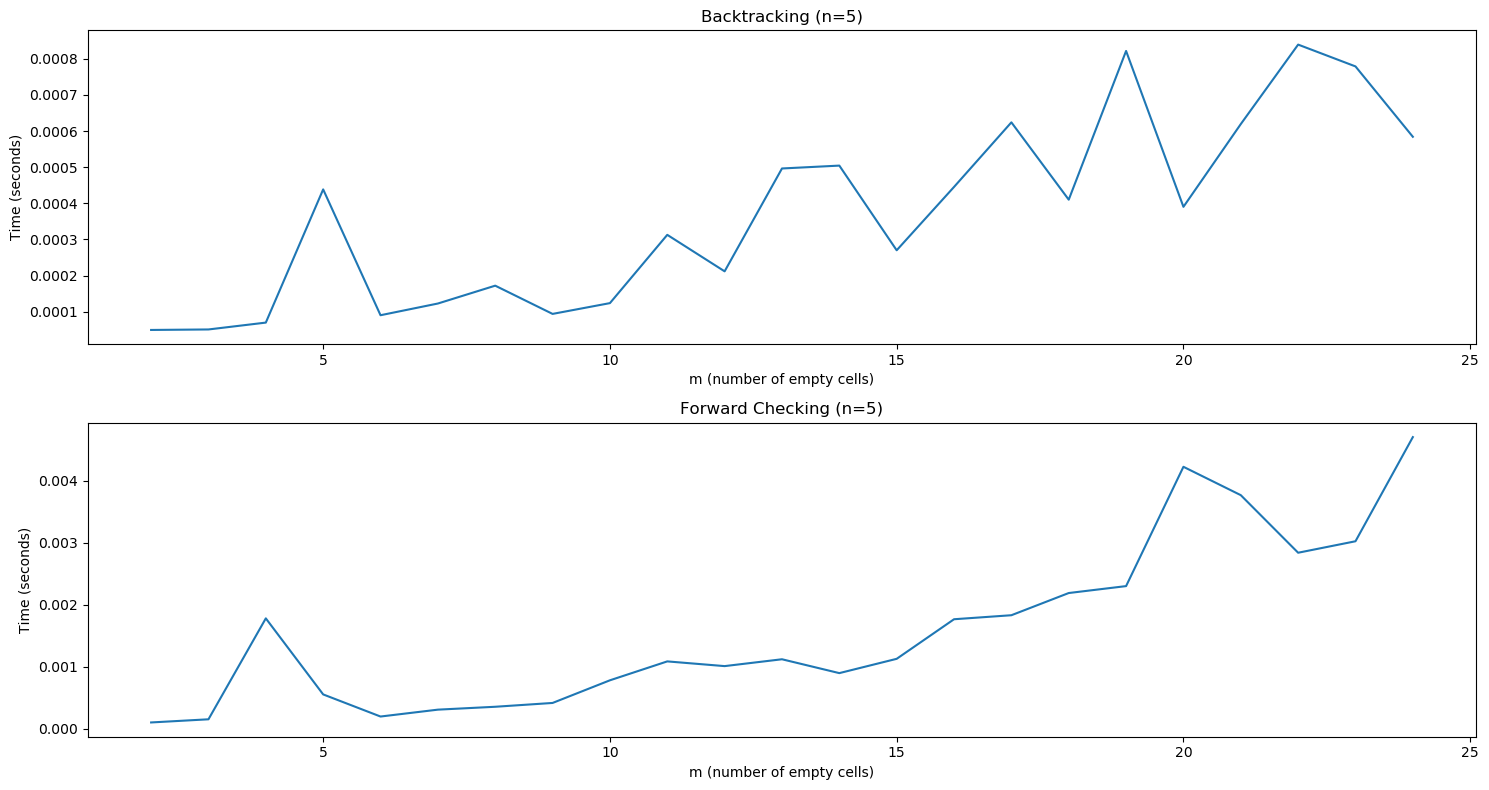

In [29]:
# plot the results
fig, axs = plt.subplots(2, 1, figsize=(15,8))

axs[0].plot(ms, backtracking_times[0,:])
axs[0].set_title(f"Backtracking (n={n})")
axs[0].set_xlabel("m (number of empty cells)")
axs[0].set_ylabel("Time (seconds)")
print()
axs[1].plot(ms, forward_checking_times[0,:])
axs[1].set_title(f"Forward Checking (n={n})")
axs[1].set_xlabel("m (number of empty cells)")
axs[1].set_ylabel("Time (seconds)")
plt.tight_layout()
plt.show()